In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

In [2]:
df = pd.read_csv("CleanedData.csv")
df['Date Added'] = pd.to_datetime(df['Date Added'])
df['LatestExpiration'] = pd.to_datetime(df['LatestExpiration'])
df['PriceStartDate'] = pd.to_datetime(df['PriceStartDate'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price                   6161 non-null   float64       
 1   PriceStartDate          6161 non-null   datetime64[ns]
 2   Date Added              6161 non-null   datetime64[ns]
 3   InflationAdjustedPrice  6161 non-null   float64       
 4   Analysis                6096 non-null   object        
 5   P or E                  6161 non-null   object        
 6   Pre2005Flag             6161 non-null   int64         
 7   PreviousPatents         6161 non-null   int64         
 8   LatestExpiration        6161 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(2)
memory usage: 433.3+ KB


In [4]:
df.describe()

,Price,InflationAdjustedPrice,Pre2005Flag,PreviousPatents
count,6161.000000,6161.000000,6161.000000,6161.000000
mean,1409.675123,586.384124,0.112319,14.258400
std,4245.307874,1764.575396,0.315785,22.955684
min,-1.000000,-0.454085,0.000000,0.000000
25%,30.530000,12.886424,0.000000,1.000000
50%,135.440000,56.813725,0.000000,6.000000
75%,727.540000,301.874536,0.000000,16.000000
max,32680.420000,13316.852565,1.000000,119.000000


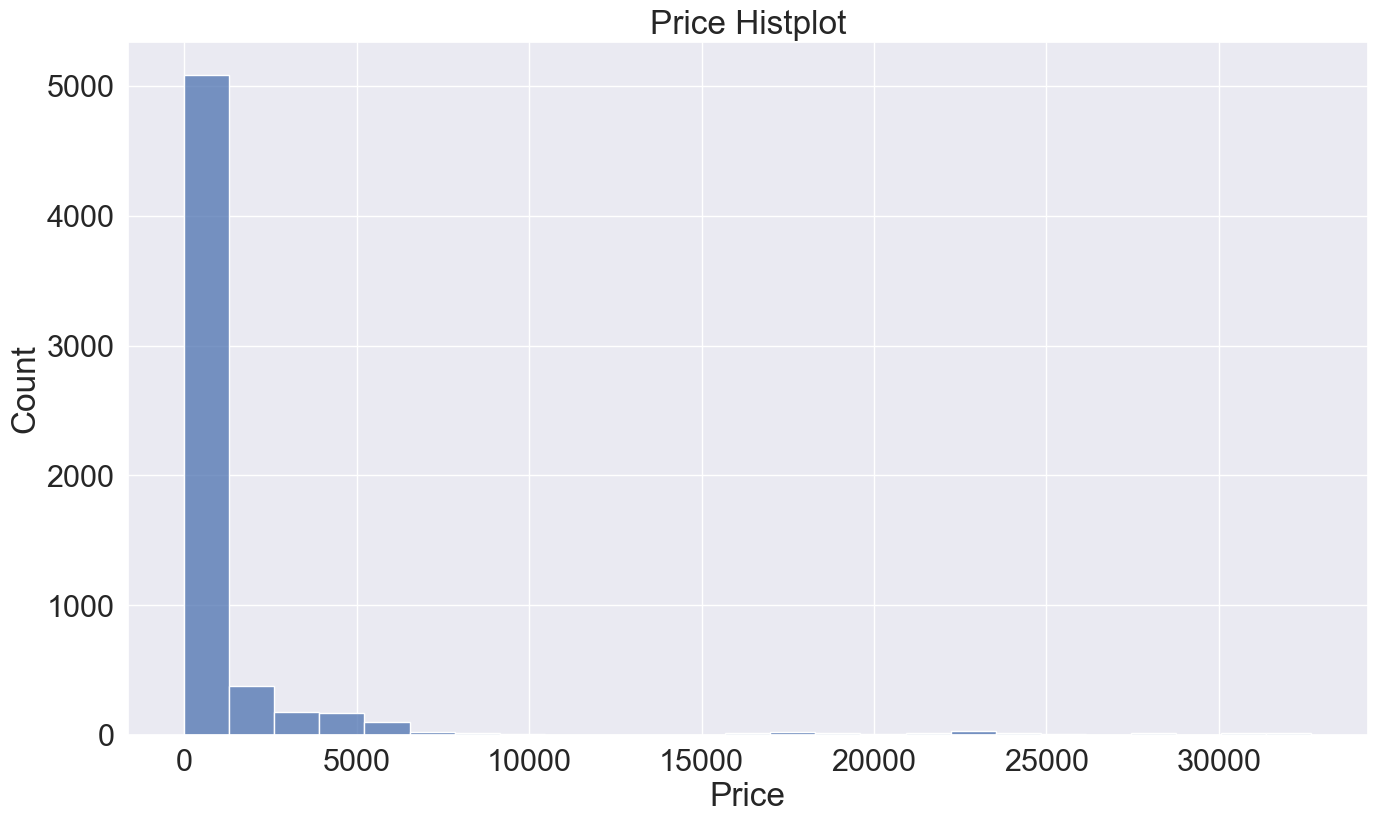

In [5]:
plt.figure(figsize=(16,9))
sns.histplot(df['Price'],bins=25)
plt.title('Price Histplot')
plt.savefig('Plots\PriceHist.png')
plt.show()

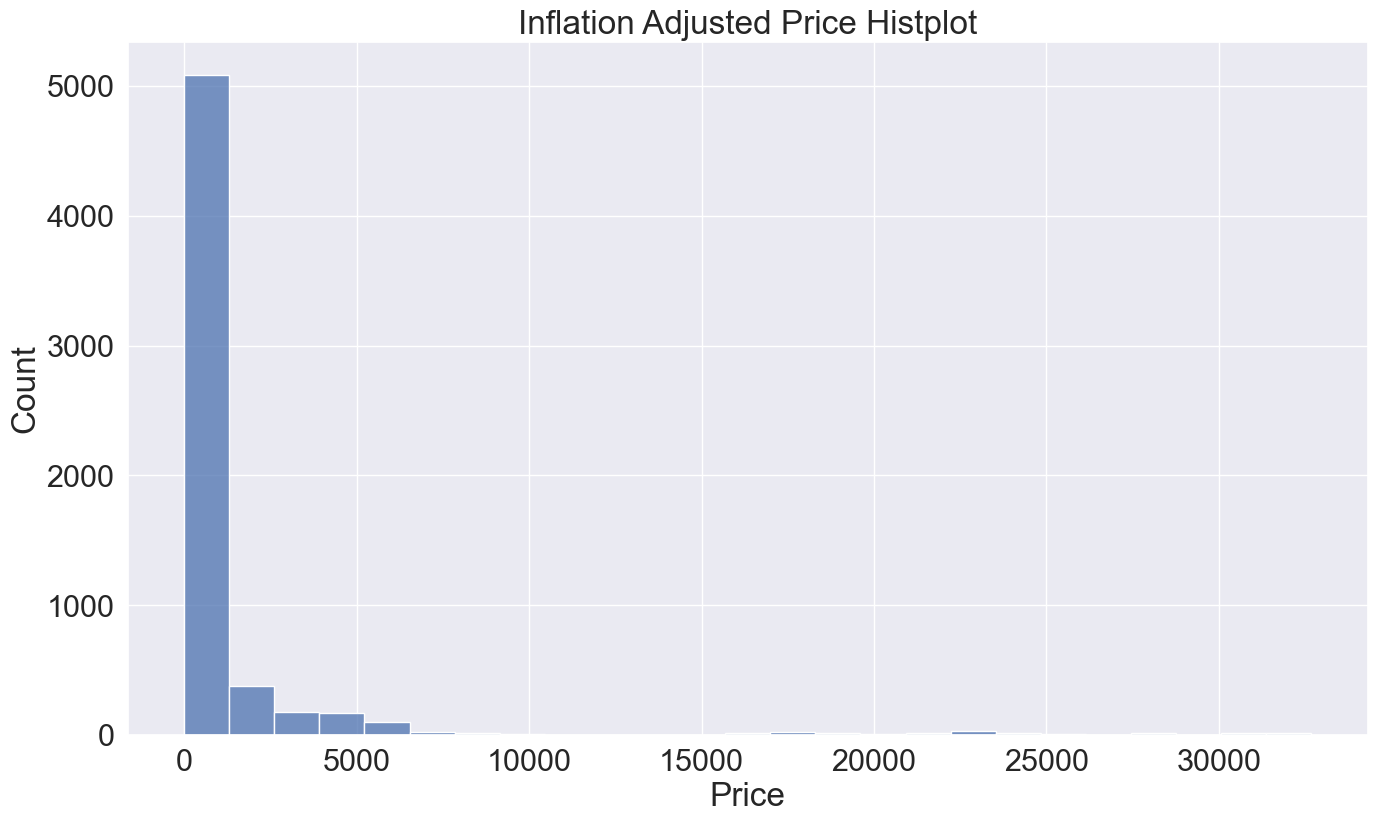

In [6]:
plt.figure(figsize=(16,9))
sns.histplot(df['Price'],bins=25)
plt.title('Inflation Adjusted Price Histplot')
plt.savefig('Plots\InflationAdjustedPriceHist.png')
plt.show()

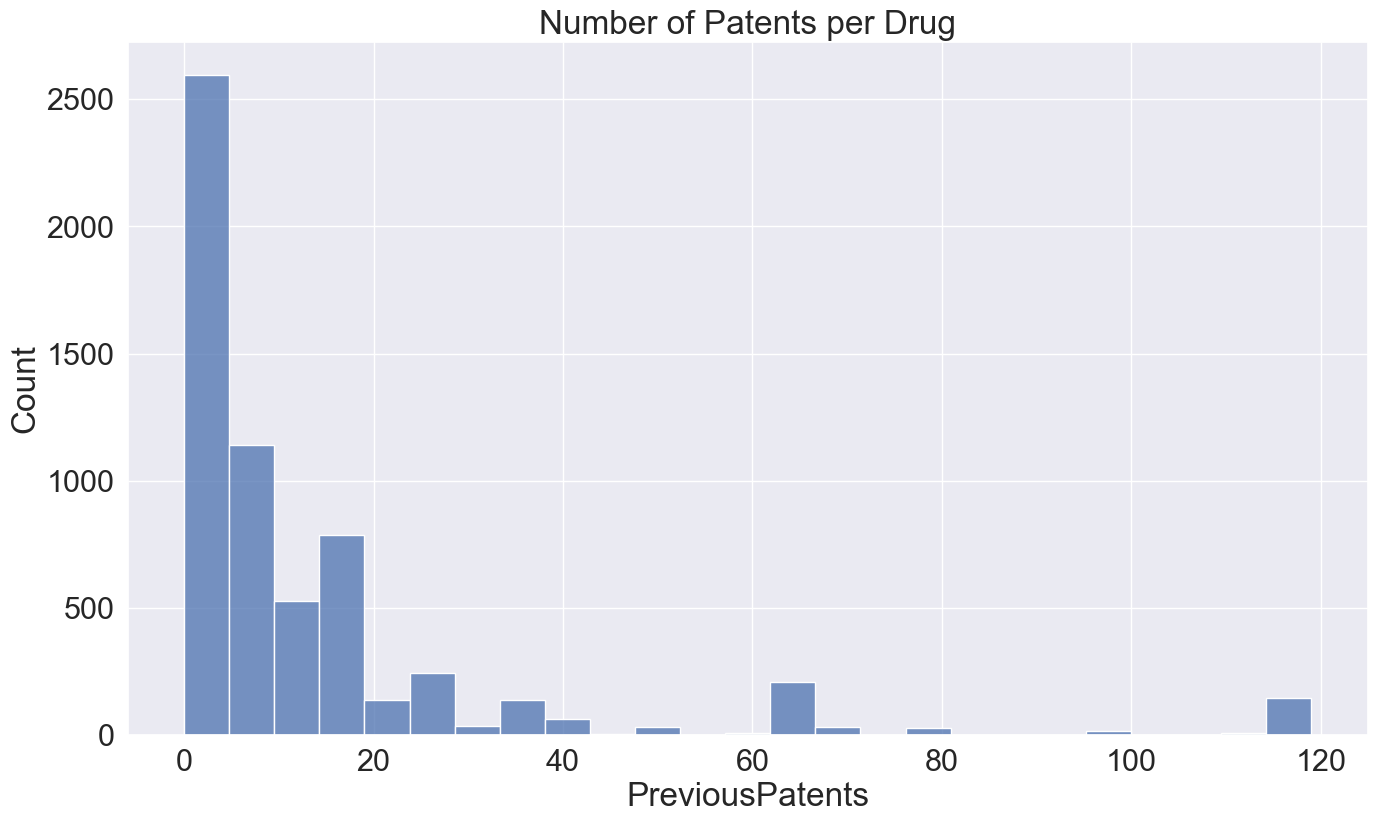

In [7]:
plt.figure(figsize=(16,9))
sns.histplot(df['PreviousPatents'],bins=25)
plt.title('Number of Patents per Drug')
plt.savefig('Plots\PatentNumber.png')
plt.show()

In [8]:
df['Year'] = pd.to_datetime(df['Date Added']).dt.year

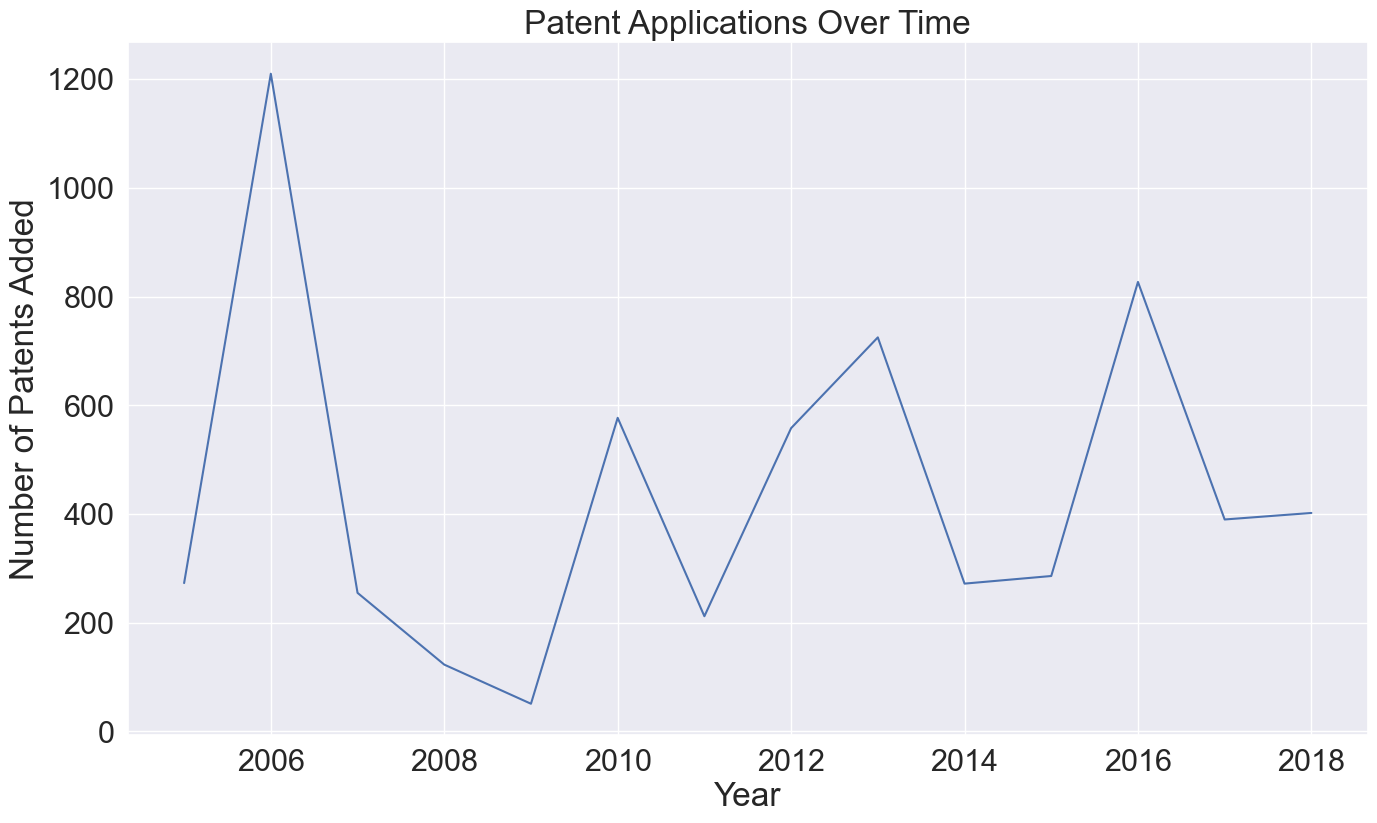

In [9]:
plt.figure(figsize=(16,9))
sns.lineplot(x = df['Year'].unique(),
             y=df.groupby(by='Year')['Year'].count())
plt.title('Patent Applications Over Time')
plt.ylabel('Number of Patents Added')
plt.xlabel('Year')
plt.savefig('Plots\ApplicationVTime.png')
plt.show()

In [10]:
df['ExtensionYear'] = pd.to_datetime(df['LatestExpiration']).dt.year

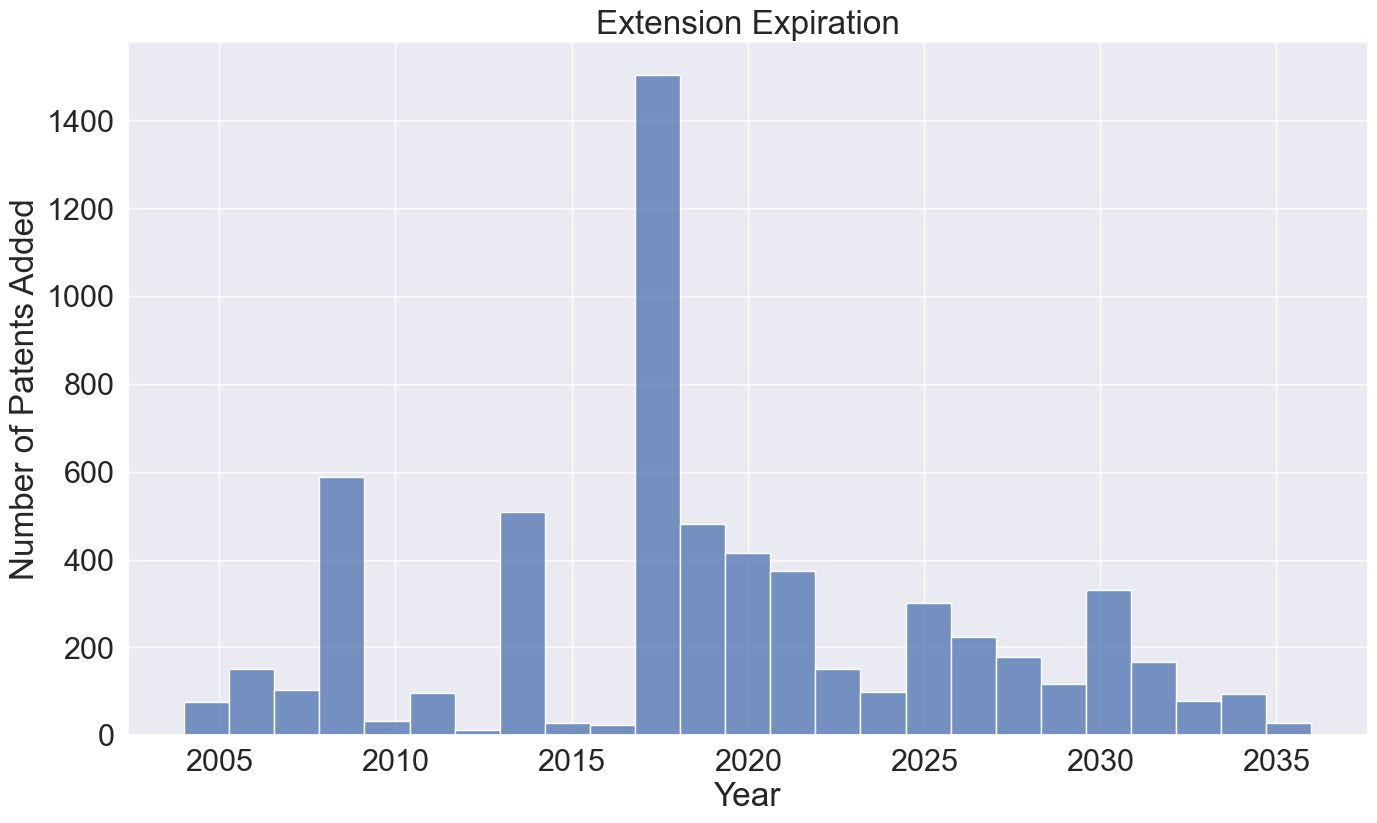

In [11]:
plt.figure(figsize=(16,9))
sns.histplot(df['ExtensionYear'],bins=25)
plt.title('Extension Expiration')
plt.ylabel('Number of Patents Added')
plt.xlabel('Year')
plt.savefig('Plots\ExtensionsVTime.png')
plt.show()

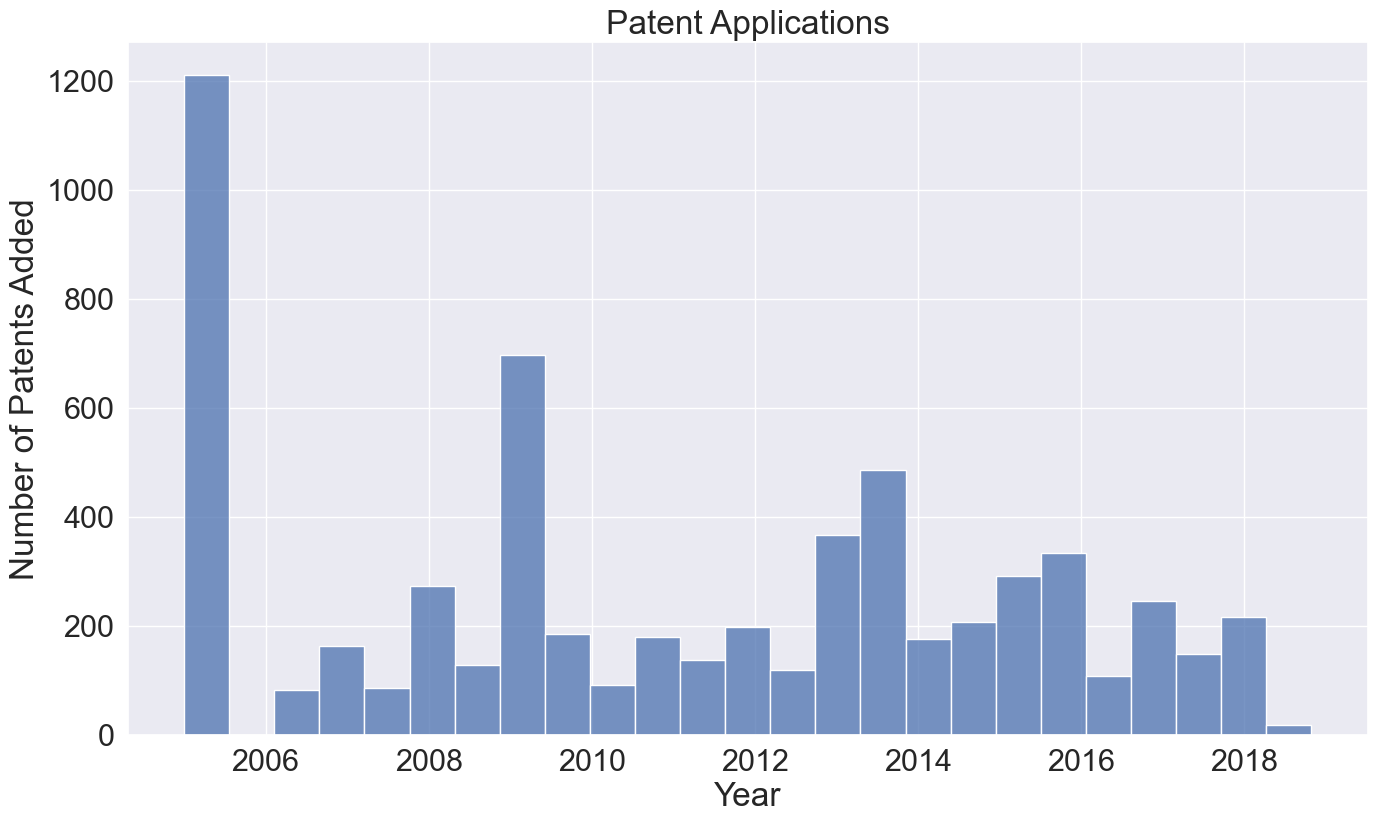

In [12]:
plt.figure(figsize=(16,9))
sns.histplot(df['Date Added'],bins=25)
plt.title('Patent Applications')
plt.ylabel('Number of Patents Added')
plt.xlabel('Year')
plt.savefig('Plots\ApplicationVTime.png')
plt.show()

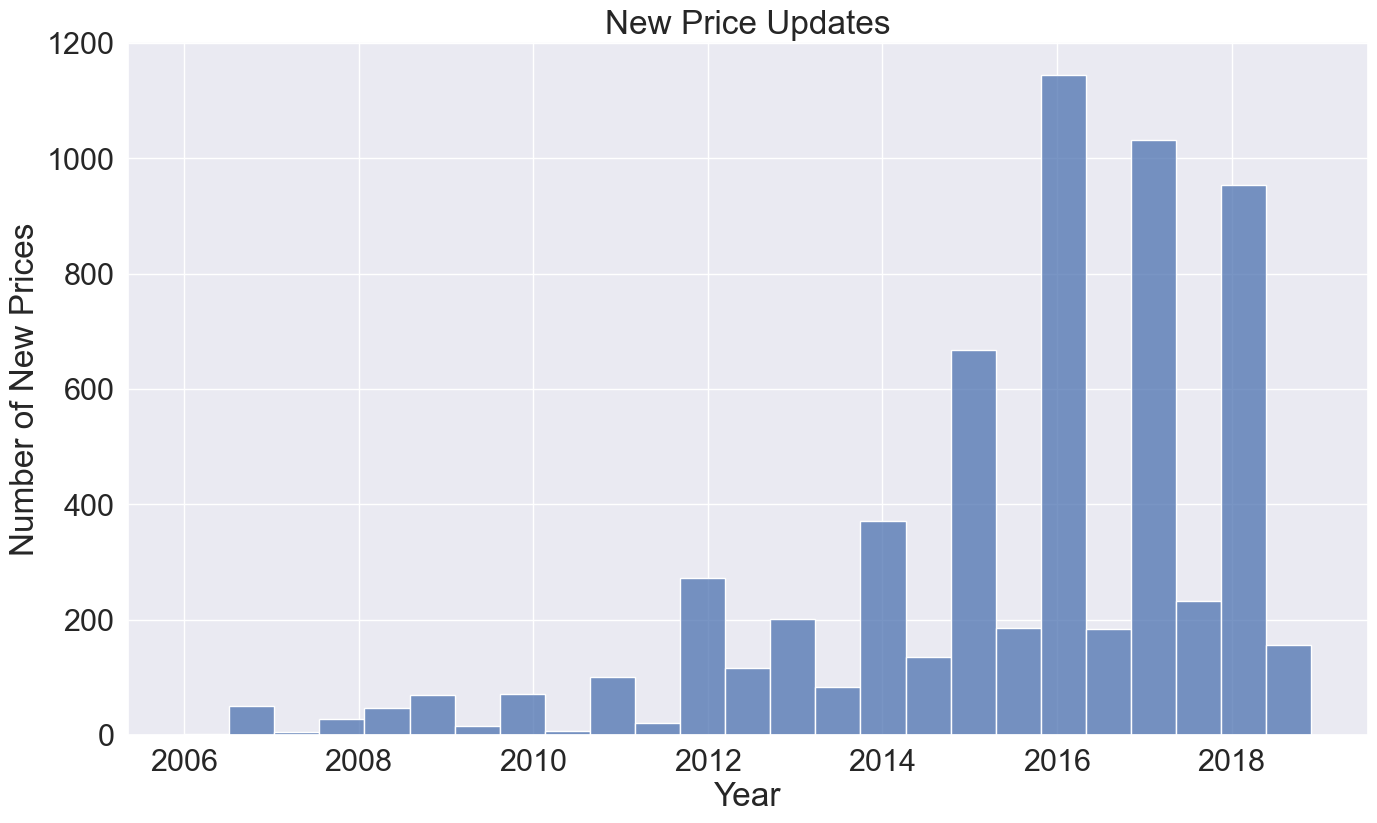

In [13]:
plt.figure(figsize=(16,9))
sns.histplot(df['PriceStartDate'],bins=25)
plt.title('New Price Updates')
plt.ylabel('Number of New Prices')
plt.xlabel('Year')
plt.savefig('Plots\PriceStartVTime.png')
plt.show()

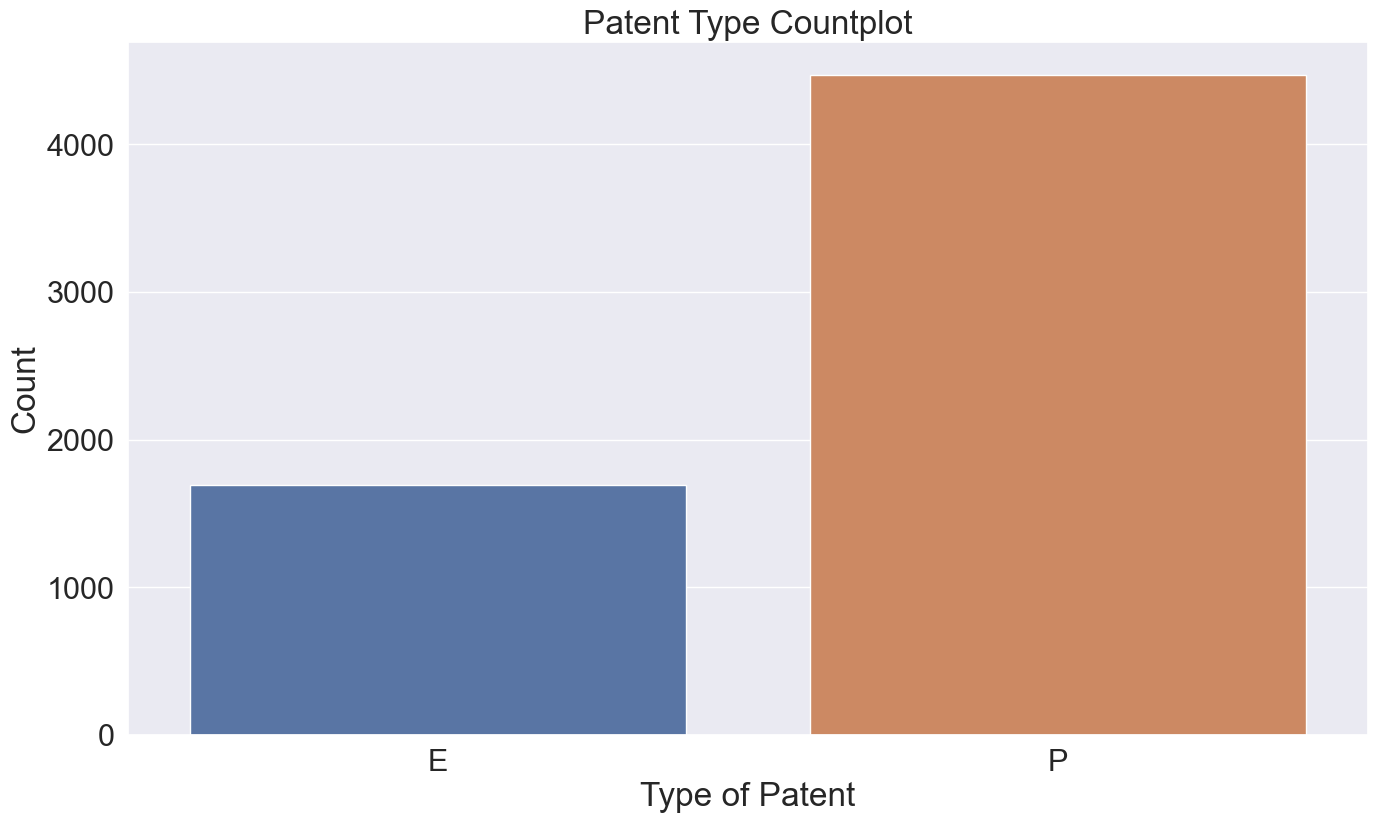

In [14]:
plt.figure(figsize=(16,9))
sns.countplot(x =df['P or E'])
plt.title('Patent Type Countplot')
plt.xlabel('Type of Patent')
plt.ylabel('Count')
plt.savefig('Plots\PatentTypes.png')
plt.show()

In [15]:
df['P or E'].value_counts(normalize=True)

P    0.725369
E    0.274631
Name: P or E, dtype: float64

In [16]:
df['Analysis'].value_counts()

P:PED                      813
Pre-2005                   692
PTAorPTE                   577
P:UCnew                    441
P:DP                       436
No change                  334
P:DP/UCnew                 278
ODE                        273
I                          239
M                          237
Added to other strength    207
DelistRequest              203
P:DP/UC                    163
NPP                        152
P:UC                       139
NCE                        139
P:DS/DP/UCnew              133
P:DS/DP                    128
P:DS                       126
PED                         89
P:PEDExtension              85
NP                          68
P:DS/DP/UC                  35
UCsamemonth                 17
PTDecrease                  14
D                           14
DP                          11
DS/DP                        9
DS/DP/UCnew                  8
P:DS/UCnew                   7
UCnew                        6
P:PEDDecrease                4
DP/UCnew

<AxesSubplot:xlabel='PreviousPatents', ylabel='InflationAdjustedPrice'>

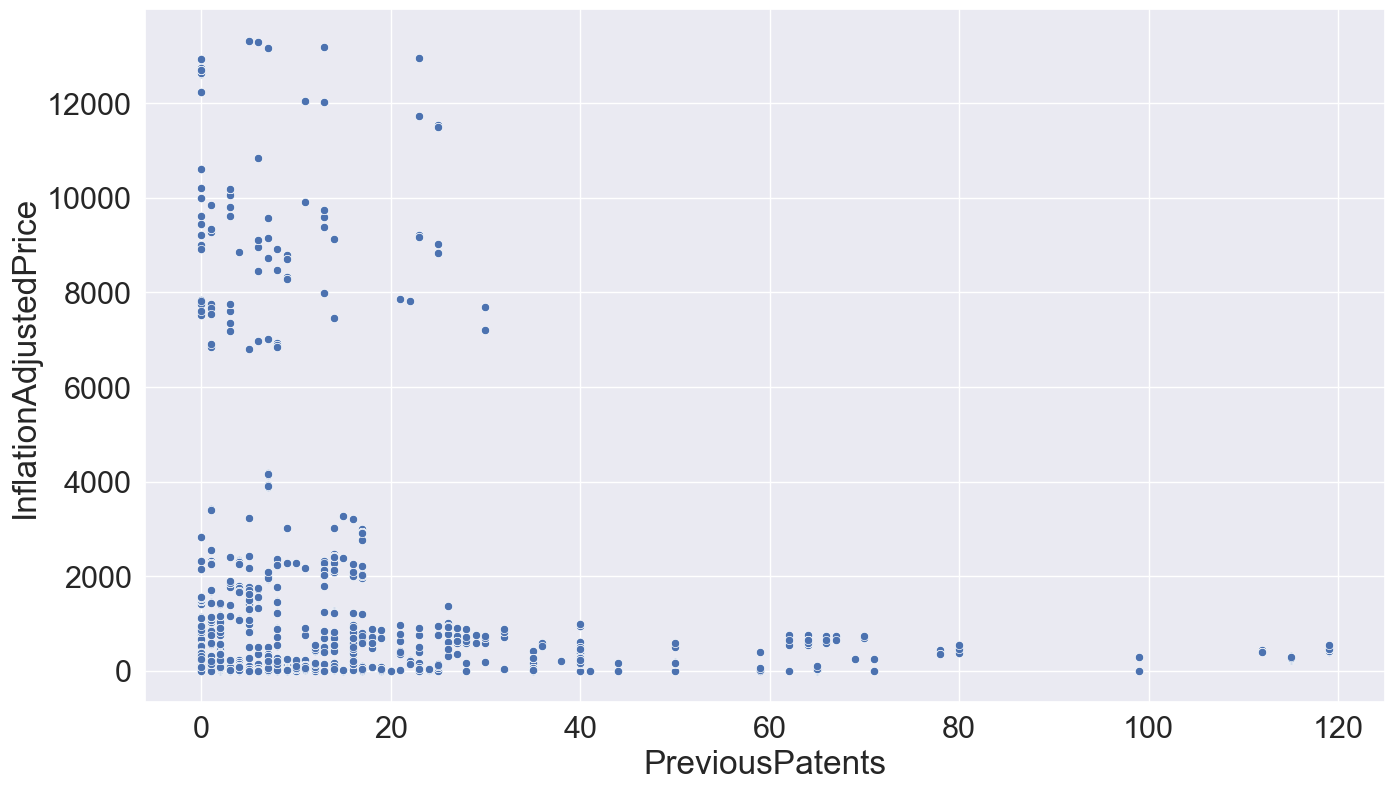

In [17]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df['PreviousPatents'],y=df['InflationAdjustedPrice'])